# Latihan Kompresi dan Dekompresi Citra JPEG

In [1]:
pip install opencv-python

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import figure
from matplotlib import image as mpimg
from scipy import fft

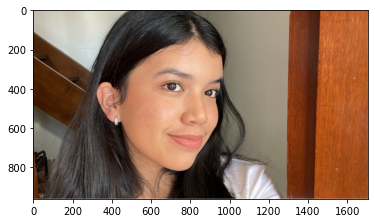

In [3]:
#Import image
img = mpimg.imread('C:/Users/Lenovo/Downloads/azmi.jpg')
imgplot = plt.imshow(img)
plt.show()

## Compression

In [4]:
#Extract Y Component
img1 = cv2.imread('C:/Users/Lenovo/Downloads/azmi.jpg',0)
y_component = img1.astype('float')
y_component

array([[192., 192., 191., ..., 138., 133., 151.],
       [184., 185., 184., ..., 128., 124., 144.],
       [184., 184., 183., ..., 116., 115., 137.],
       ...,
       [ 65.,  60.,  58., ...,  97.,  97., 120.],
       [ 61.,  61.,  59., ..., 101.,  97., 117.],
       [238., 237., 237., ..., 241., 241., 242.]])

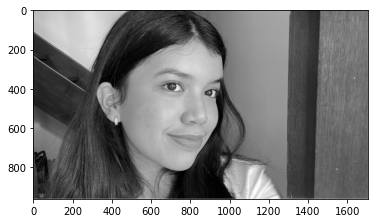

In [5]:
plt.imshow(y_component, cmap="gray")
plt.show()

In [6]:
# Mengambil bagian kecil dari komponen gambar dan membaginya menjadi macroblock 8x8 pixel

y_macroblock = []

for i in range(80,88):
    y_macroblock.append(y_component[i][0:8])
y_macroblock = np.array(y_macroblock)

#Tabel warna macroblock komponen Y
y_macroblock

array([[182., 183., 181., 182., 185., 183., 182., 187.],
       [178., 180., 181., 182., 184., 182., 183., 188.],
       [179., 181., 182., 182., 182., 180., 181., 185.],
       [181., 182., 182., 182., 182., 181., 181., 182.],
       [181., 180., 179., 181., 182., 185., 185., 183.],
       [183., 181., 180., 180., 181., 184., 185., 182.],
       [183., 183., 183., 181., 178., 181., 184., 183.],
       [179., 181., 183., 181., 176., 180., 186., 187.]])

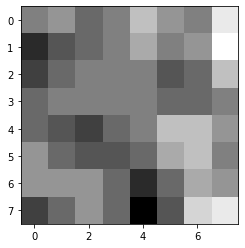

In [7]:
plt.imshow(y_macroblock, cmap="gray")
plt.show()

In [8]:
#Dikurang 128 karena DCT bekerja pada rentang -128 sampai 127
y_macroblock1 = y_macroblock-128

y_macroblock1

array([[54., 55., 53., 54., 57., 55., 54., 59.],
       [50., 52., 53., 54., 56., 54., 55., 60.],
       [51., 53., 54., 54., 54., 52., 53., 57.],
       [53., 54., 54., 54., 54., 53., 53., 54.],
       [53., 52., 51., 53., 54., 57., 57., 55.],
       [55., 53., 52., 52., 53., 56., 57., 54.],
       [55., 55., 55., 53., 50., 53., 56., 55.],
       [51., 53., 55., 53., 48., 52., 58., 59.]])

In [9]:
#Transform Coding - DCT
img_dct = fft.dct(y_macroblock1)
img_dct

array([[ 8.82000000e+02, -1.15377364e+01,  4.46088499e+00,
        -1.44831425e+00,  9.89949494e+00, -1.32864519e+01,
        -3.17025336e-01, -5.03210453e-01],
       [ 8.68000000e+02, -2.64960250e+01,  0.00000000e+00,
        -1.12749988e+01,  8.48528137e+00, -8.94275207e+00,
         0.00000000e+00,  1.69181685e+00],
       [ 8.56000000e+02, -9.54714243e+00,  0.00000000e+00,
        -1.39007765e+01,  5.65685425e+00, -5.88648151e+00,
         0.00000000e+00,  9.84794585e-01],
       [ 8.58000000e+02,  8.12509130e-01, -1.84775907e+00,
        -4.01469043e+00,  1.41421356e+00, -2.68253038e+00,
        -7.65366865e-01,  1.61618115e-01],
       [ 8.64000000e+02, -1.92948607e+01,  2.61312593e+00,
         1.15055886e+01, -2.82842712e+00,  3.58154878e+00,
        -1.08239220e+00, -3.24072374e+00],
       [ 8.64000000e+02, -9.52492885e+00,  8.92176999e+00,
         1.21810845e+01, -5.65685425e+00,  5.73376091e+00,
        -6.34050671e-01,  1.44556171e-01],
       [ 8.64000000e+02,  1.729883

In [10]:
 #Transform Coding -Quantization
quantization_table = np.matrix('16 11 10 16 24 40 51 61;\
 12 12 14 19 26 58 60 55;\
 14 13 16 24 40 57 69 56;\
 14 17 22 29 51 87 80 62;\
 18 22 37 56 68 109 103 77;\
 24 35 55 64 81 104 103 92;\
 49 64 78 77 103 121 120 101;\
 72 92 95 98 112 100 103 99').astype('float')
quantization_table = np.array(quantization_table.tolist())
quantization_table

array([[ 16.,  11.,  10.,  16.,  24.,  40.,  51.,  61.],
       [ 12.,  12.,  14.,  19.,  26.,  58.,  60.,  55.],
       [ 14.,  13.,  16.,  24.,  40.,  57.,  69.,  56.],
       [ 14.,  17.,  22.,  29.,  51.,  87.,  80.,  62.],
       [ 18.,  22.,  37.,  56.,  68., 109., 103.,  77.],
       [ 24.,  35.,  55.,  64.,  81., 104., 103.,  92.],
       [ 49.,  64.,  78.,  77., 103., 121., 120., 101.],
       [ 72.,  92.,  95.,  98., 112., 100., 103.,  99.]])

In [11]:
# Transform COding
for i in range(8):
     for j in range(8):
        img_dct[i][j] = round(img_dct[i][j]/quantization_table[i][j])
img_dct

array([[55., -1.,  0., -0.,  0., -0., -0., -0.],
       [72., -2.,  0., -1.,  0., -0.,  0.,  0.],
       [61., -1.,  0., -1.,  0., -0.,  0.,  0.],
       [61.,  0., -0., -0.,  0., -0., -0.,  0.],
       [48., -1.,  0.,  0., -0.,  0., -0., -0.],
       [36., -0.,  0.,  0., -0.,  0., -0.,  0.],
       [18.,  0.,  0., -0., -0.,  0., -0., -0.],
       [12., -0.,  0., -0., -0.,  0., -0., -0.]])

## Decompression

In [12]:
#Nilai warna kemudian dikalikan lagi dengan tabel kuantisasi
img_idct = img_dct
for i in range(8):
    for j in range(8):
        img_idct[i][j] = round(img_dct[i][j]*quantization_table[i][j])
img_idct

array([[880., -11.,   0.,  -0.,   0.,  -0.,  -0.,  -0.],
       [864., -24.,   0., -19.,   0.,  -0.,   0.,   0.],
       [854., -13.,   0., -24.,   0.,  -0.,   0.,   0.],
       [854.,   0.,  -0.,  -0.,   0.,  -0.,  -0.,   0.],
       [864., -22.,   0.,   0.,  -0.,   0.,  -0.,  -0.],
       [864.,  -0.,   0.,   0.,  -0.,   0.,  -0.,   0.],
       [882.,   0.,   0.,  -0.,  -0.,   0.,  -0.,  -0.],
       [864.,  -0.,   0.,  -0.,  -0.,   0.,  -0.,  -0.]])

In [13]:
# Transform Coding - Invers DCT
# Nilai warna kemudian dihitung lagi dengan rumus Invers DCT dan dibulatkan
img_idct = fft.idct(img_dct)
for i in range(8):
     for j in range(8):
        img_idct[i][j] = round(img_idct[i][j])
img_idct

array([[54., 54., 54., 55., 55., 56., 56., 56.],
       [49., 52., 55., 55., 53., 53., 56., 59.],
       [49., 53., 55., 55., 52., 51., 54., 57.],
       [53., 53., 53., 53., 53., 53., 53., 53.],
       [51., 52., 52., 53., 55., 56., 56., 57.],
       [54., 54., 54., 54., 54., 54., 54., 54.],
       [55., 55., 55., 55., 55., 55., 55., 55.],
       [54., 54., 54., 54., 54., 54., 54., 54.]])

In [14]:
#Nilai warna kemudian ditambahkan kembali dengan nilai 128
img_idct += 128
img_idct

array([[182., 182., 182., 183., 183., 184., 184., 184.],
       [177., 180., 183., 183., 181., 181., 184., 187.],
       [177., 181., 183., 183., 180., 179., 182., 185.],
       [181., 181., 181., 181., 181., 181., 181., 181.],
       [179., 180., 180., 181., 183., 184., 184., 185.],
       [182., 182., 182., 182., 182., 182., 182., 182.],
       [183., 183., 183., 183., 183., 183., 183., 183.],
       [182., 182., 182., 182., 182., 182., 182., 182.]])

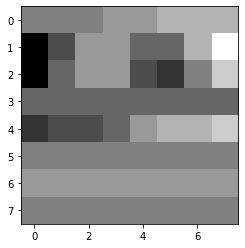

In [15]:
plt.imshow(img_idct, cmap="gray")
plt.show()

## Perbandingan nilai warna sebelum dan sesudah kompresi

In [16]:
before = y_macroblock
after = img_idct

### Before

In [17]:
before

array([[182., 183., 181., 182., 185., 183., 182., 187.],
       [178., 180., 181., 182., 184., 182., 183., 188.],
       [179., 181., 182., 182., 182., 180., 181., 185.],
       [181., 182., 182., 182., 182., 181., 181., 182.],
       [181., 180., 179., 181., 182., 185., 185., 183.],
       [183., 181., 180., 180., 181., 184., 185., 182.],
       [183., 183., 183., 181., 178., 181., 184., 183.],
       [179., 181., 183., 181., 176., 180., 186., 187.]])

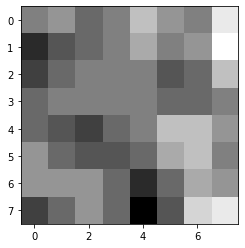

In [18]:
plt.imshow(y_macroblock, cmap="gray")
plt.show()

### After

In [19]:
after

array([[182., 182., 182., 183., 183., 184., 184., 184.],
       [177., 180., 183., 183., 181., 181., 184., 187.],
       [177., 181., 183., 183., 180., 179., 182., 185.],
       [181., 181., 181., 181., 181., 181., 181., 181.],
       [179., 180., 180., 181., 183., 184., 184., 185.],
       [182., 182., 182., 182., 182., 182., 182., 182.],
       [183., 183., 183., 183., 183., 183., 183., 183.],
       [182., 182., 182., 182., 182., 182., 182., 182.]])

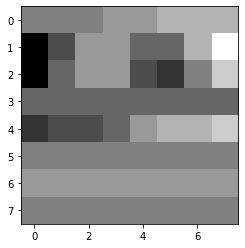

In [20]:
plt.imshow(img_idct, cmap="gray")
plt.show()